# Northwind Business Analysis

## Module 2 Final Project

Student Name: Bonny Nichol<br>
Student Pace: Self Pace<br>
Instructor Name: Jeff Herman<br>
Date: October 29, 2020

## Project Goal

The data in this project is queried from the Northwind database, a free and open-source database created by Microsoft for a fictional company. The goal of the project is to query the database and to perform statistical analysis and hypothesis testing to generate analytical insights that can be of value to the company. From the database we are able to gather information about employees, orders, shipping performance, and other valuable information to provide advice to the company.<br><br>
The database is shown below:


In [641]:
from IPython.display import Image
from IPython.display import HTML
Image(url = "https://raw.githubusercontent.com/learn-co-curriculum/dsc-mod-3-project/master/Northwind_ERD_updated.png")

## Importing Libraries

In [642]:
# Importing required libraries

import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
import pandas.util.testing as tm
plt.style.use('seaborn')
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Importing Data

In [643]:
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

#Finding all tables
tables = cur.execute("SELECT name FROM sqlite_master WHERE type = 'table';").fetchall()
tables

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

In [644]:
#Converting to dataframes

df_Employee = pd.read_sql_query('SELECT * FROM Employee;', conn)
df_Category = pd.read_sql_query('SELECT * FROM Category;', conn)
df_Customer = pd.read_sql_query('SELECT * FROM Customer;', conn)
df_Shipper = pd.read_sql_query('SELECT * FROM Shipper;', conn)
df_Supplier = pd.read_sql_query('SELECT * FROM Supplier;', conn)
df_Order = pd.read_sql_query('SELECT * FROM [Order];', conn)
df_Product = pd.read_sql_query('SELECT * FROM Product;', conn)
df_OrderDetail = pd.read_sql_query('SELECT * FROM OrderDetail;', conn)
df_CustomerCustomerDemo = pd.read_sql_query('SELECT * FROM CustomerCustomerDemo;', conn)
df_CustomerDemographic = pd.read_sql_query('SELECT * FROM CustomerDemographic;', conn)
df_Region = pd.read_sql_query('SELECT * FROM Region;', conn)
df_Territory = pd.read_sql_query('SELECT * FROM Territory;', conn)
df_EmployeeTerritory = pd.read_sql_query('SELECT * FROM EmployeeTerritory;', conn)

## Data Exploration

#### Employee Data
Northwind appears to be a small company with only 9 employees based in North America and the British Isles. 

In [645]:
df_Employee.head(20)

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp
5,6,Suyama,Michael,Sales Representative,Mr.,1995-07-02,2025-10-17,Coventry House Miner Rd.,London,British Isles,EC2 7JR,UK,(71) 555-7773,428,None,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp
6,7,King,Robert,Sales Representative,Mr.,1992-05-29,2026-01-02,Edgeham Hollow Winchester Way,London,British Isles,RG1 9SP,UK,(71) 555-5598,465,None,Robert King served in the Peace Corps and trav...,5.0,http://accweb/emmployees/davolio.bmp
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1990-01-09,2026-03-05,4726 - 11th Ave. N.E.,Seattle,North America,98105,USA,(206) 555-1189,2344,None,Laura received a BA in psychology from the Uni...,2.0,http://accweb/emmployees/davolio.bmp
8,9,Dodsworth,Anne,Sales Representative,Ms.,1998-01-27,2026-11-15,7 Houndstooth Rd.,London,British Isles,WG2 7LT,UK,(71) 555-4444,452,None,Anne has a BA degree in English from St. Lawre...,5.0,http://accweb/emmployees/davolio.bmp


#### Category Data
There are 8 categories of food sold in their production ranging from refrigerated to non-refrigerated food types.

In [646]:
df_Category.head(10)

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


#### Customer Data
There are 91 entries for customer names with the majority of these customers being located in Western Europe.

In [647]:
df_Customer.head()

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [648]:
df_Customer.groupby('Region').count()

,Id,CompanyName,ContactName,ContactTitle,Address,City,PostalCode,Country,Phone,Fax
Region,,,,,,,,,,
British Isles,8,8,8,8,8,8,7,8,8,6
Central America,5,5,5,5,5,5,5,5,5,3
Eastern Europe,1,1,1,1,1,1,1,1,1,1
North America,16,16,16,16,16,16,16,16,16,12
Northern Europe,4,4,4,4,4,4,4,4,4,3
Scandinavia,3,3,3,3,3,3,3,3,3,3
South America,16,16,16,16,16,16,16,16,16,10
Southern Europe,10,10,10,10,10,10,10,10,10,8
Western Europe,28,28,28,28,28,28,28,28,28,23


In [649]:
df_Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            91 non-null     object
 1   CompanyName   91 non-null     object
 2   ContactName   91 non-null     object
 3   ContactTitle  91 non-null     object
 4   Address       91 non-null     object
 5   City          91 non-null     object
 6   Region        91 non-null     object
 7   PostalCode    90 non-null     object
 8   Country       91 non-null     object
 9   Phone         91 non-null     object
 10  Fax           69 non-null     object
dtypes: object(11)
memory usage: 7.9+ KB


#### Shipper Data
There are only 3 shipping companies that provide services for Northwind.

In [650]:
df_Shipper.head()

,Id,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


#### Supplier Data
There are 29 suppliers located in 11 different regions.

In [651]:
df_Supplier.head(30)

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,British Isles,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,North America,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,North America,48104,USA,(313) 555-5735,(313) 555-3349,None
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,Eastern Asia,100,Japan,(03) 3555-5011,None,None
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Southern Europe,33007,Spain,(98) 598 76 54,None,None
5,6,Mayumi's,Mayumi Ohno,Marketing Representative,92 Setsuko Chuo-ku,Osaka,Eastern Asia,545,Japan,(06) 431-7877,None,Mayumi's (on the World Wide Web)#http://www.mi...
6,7,"Pavlova, Ltd.",Ian Devling,Marketing Manager,74 Rose St. Moonie Ponds,Melbourne,Victoria,3058,Australia,(03) 444-2343,(03) 444-6588,None
7,8,"Specialty Biscuits, Ltd.",Peter Wilson,Sales Representative,29 King's Way,Manchester,British Isles,M14 GSD,UK,(161) 555-4448,None,None
8,9,PB Knäckebröd AB,Lars Peterson,Sales Agent,Kaloadagatan 13,Göteborg,Northern Europe,S-345 67,Sweden,031-987 65 43,031-987 65 91,None
9,10,Refrescos Americanas LTDA,Carlos Diaz,Marketing Manager,Av. das Americanas 12.890,Sao Paulo,South America,5442,Brazil,(11) 555 4640,None,None


In [652]:
df_Supplier.groupby('Region').count()

,Id,CompanyName,ContactName,ContactTitle,Address,City,PostalCode,Country,Phone,Fax,HomePage
Region,,,,,,,,,,,
British Isles,2,2,2,2,2,2,2,2,2,0,0
Eastern Asia,2,2,2,2,2,2,2,2,2,0,1
NSW,1,1,1,1,1,1,1,1,1,1,1
North America,6,6,6,6,6,6,6,6,6,3,1
Northern Europe,4,4,4,4,4,4,4,4,4,3,0
Scandinavia,2,2,2,2,2,2,2,2,2,0,0
South America,1,1,1,1,1,1,1,1,1,0,0
South-East Asia,1,1,1,1,1,1,1,1,1,0,0
Southern Europe,3,3,3,3,3,3,3,3,3,2,1


#### Order Data
There are 830 orders shipped to 70 different cities worldwide.

In [653]:
df_Order.tail()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
825,11073,PERIC,2,2014-05-05,2014-06-02,None,2,24.95,Pericles Comidas clásicas,Calle Dr. Jorge Cash 321,México D.F.,Central America,05033,Mexico
826,11074,SIMOB,7,2014-05-06,2014-06-03,None,2,18.44,Simons bistro,Vinbæltet 34,Kobenhavn,Northern Europe,1734,Denmark
827,11075,RICSU,8,2014-05-06,2014-06-03,None,2,6.19,Richter Supermarkt,Starenweg 5,Genève,Western Europe,1204,Switzerland
828,11076,BONAP,4,2014-05-06,2014-06-03,None,2,38.28,Bon app',"12, rue des Bouchers",Marseille,Western Europe,13008,France
829,11077,RATTC,1,2014-05-06,2014-06-03,None,2,8.53,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,North America,87110,USA


In [654]:
df_Order.count()

Id                830
CustomerId        830
EmployeeId        830
OrderDate         830
RequiredDate      830
ShippedDate       809
ShipVia           830
Freight           830
ShipName          830
ShipAddress       830
ShipCity          830
ShipRegion        830
ShipPostalCode    811
ShipCountry       830
dtype: int64

In [655]:
df_Order.groupby('ShipCity').count()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipRegion,ShipPostalCode,ShipCountry
ShipCity,,,,,,,,,,,,,
Aachen,6,6,6,6,6,6,6,6,6,6,6,6,6
Albuquerque,18,18,18,18,18,17,18,18,18,18,18,18,18
Anchorage,10,10,10,10,10,10,10,10,10,10,10,10,10
Barcelona,5,5,5,5,5,5,5,5,5,5,5,5,5
Barquisimeto,14,14,14,14,14,12,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vancouver,3,3,3,3,3,3,3,3,3,3,3,3,3
Versailles,4,4,4,4,4,4,4,4,4,4,4,4,4
Walla Walla,2,2,2,2,2,2,2,2,2,2,2,2,2


#### Product Data
There are 77 different products. The minimum price per unit is 2.5 and the max price is 263.5 with the mean being 28.8.

In [656]:
df_Product

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
72,73,Röd Kaviar,17,8,24 - 150 g jars,15.00,101,0,5,0
73,74,Longlife Tofu,4,7,5 kg pkg.,10.00,4,20,5,0
74,75,Rhönbräu Klosterbier,12,1,24 - 0.5 l bottles,7.75,125,0,25,0
75,76,Lakkalikööri,23,1,500 ml,18.00,57,0,20,0


In [657]:
df_Product.describe()

,Id,SupplierId,CategoryId,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,13.649351,4.116883,28.866364,40.506494,10.129870,12.467532,0.103896
std,22.371857,8.220267,2.395028,33.815111,36.147222,23.141072,10.931105,0.307127
min,1.000000,1.000000,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,7.000000,2.000000,13.250000,15.000000,0.000000,0.000000,0.000000
50%,39.000000,13.000000,4.000000,19.500000,26.000000,0.000000,10.000000,0.000000
75%,58.000000,20.000000,6.000000,33.250000,61.000000,0.000000,25.000000,0.000000
max,77.000000,29.000000,8.000000,263.500000,125.000000,100.000000,30.000000,1.000000


#### Order Detail Data
The database contains 2155 product orders (multiple entries can belong to same overall order). 838 products have a discount applied to the order.

In [658]:
df_OrderDetail

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.00,12,0.00
1,10248/42,10248,42,9.80,10,0.00
2,10248/72,10248,72,34.80,5,0.00
3,10249/14,10249,14,18.60,9,0.00
4,10249/51,10249,51,42.40,40,0.00
...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03
2151,11077/66,11077,66,17.00,1,0.00
2152,11077/73,11077,73,15.00,2,0.01
2153,11077/75,11077,75,7.75,4,0.00


In [659]:
df_OrderDetail.agg({'Discount':lambda ts: (ts > 0).sum()})

Discount    838
dtype: int64

In [660]:
df_CustomerCustomerDemo.head()

,Id,CustomerTypeId


In [661]:
df_CustomerDemographic

,Id,CustomerDesc


#### Region Data
This database classifies the regions as Eastern, Western, Northern and Southern

In [662]:
df_Region

,Id,RegionDescription
0,1,Eastern
1,2,Western
2,3,Northern
3,4,Southern


#### Territory Data
The territory data contains the cities and which regions they are associated with.

In [663]:
df_Territory.head()

,Id,TerritoryDescription,RegionId
0,01581,Westboro,1
1,01730,Bedford,1
2,01833,Georgetow,1
3,02116,Boston,1
4,02139,Cambridge,1


In [664]:
df_Territory.groupby('RegionId').count()

,Id,TerritoryDescription
RegionId,,
1,19,19
2,15,15
3,11,11
4,8,8


#### Employee Territory Data
The employee territory data shows which regions are associated with the employees.

In [665]:
df_EmployeeTerritory.head()

,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581
3,2/01730,2,01730
4,2/01833,2,01833


# Hypothesis Set-up

Now that the data has been examined for each entry in the database, it is now possible to create the null and alternative hypothesis for the hypothesis testing and to find the statistical significance. In hypothesis testing, the Null Hypothesis basically states that no observations have any interesting significance to them, ie NULL. "Nothing interesting is going." The alternative hypothesis is more complex and states that there is some statistical significance to the data.

## Question #1 - Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

### 1.1 Exploratory Analysis

We will set up the Null and Alternative Hypothesis as follows:

𝐻0 - Null Hypothesis - The average quantity of a product in an order is not affected by a discount of the order.<br><br>
𝐻1 - Alternative Hypothesis - The average quantity of a product in an order will either be higher or lower  when there is a discount than when there is no discount.<br><br>
We can briefly see the mean discount applied to orders and the mean quantity:

In [666]:
df_OrderDetail[['Quantity','Discount']].describe()

,Quantity,Discount
count,2155.000000,2155.000000
mean,23.812993,0.056167
std,19.022047,0.083450
min,1.000000,0.000000
25%,10.000000,0.000000
50%,20.000000,0.000000
75%,30.000000,0.100000
max,130.000000,0.250000


In [667]:
nodiscount = df_OrderDetail.loc[df_OrderDetail['Discount'] == 0]
discount = df_OrderDetail.loc[df_OrderDetail['Discount'] > 0]

The control of our hypothesis testing is not having a discount applied to the order. The experimental of our hypothesis testing is having a discount (in general, not a specific discount type) applied to the order. We will plot this in order to have an idea of the distribution of the quantity ordered.

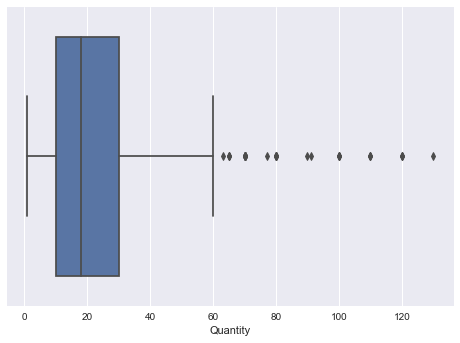

In [668]:
#Boxplot of Orders with No discounts
ax = sns.boxplot(x=nodiscount["Quantity"])

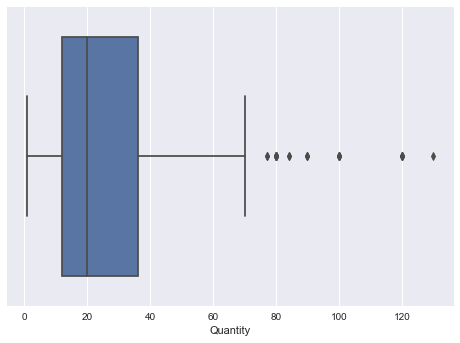

In [669]:
#Boxplot of Orders with Discounts
ax = sns.boxplot(x=discount["Quantity"])

We will create a plot of the probability distributions to check the differences between the mean and standard deviation of the sample populations.

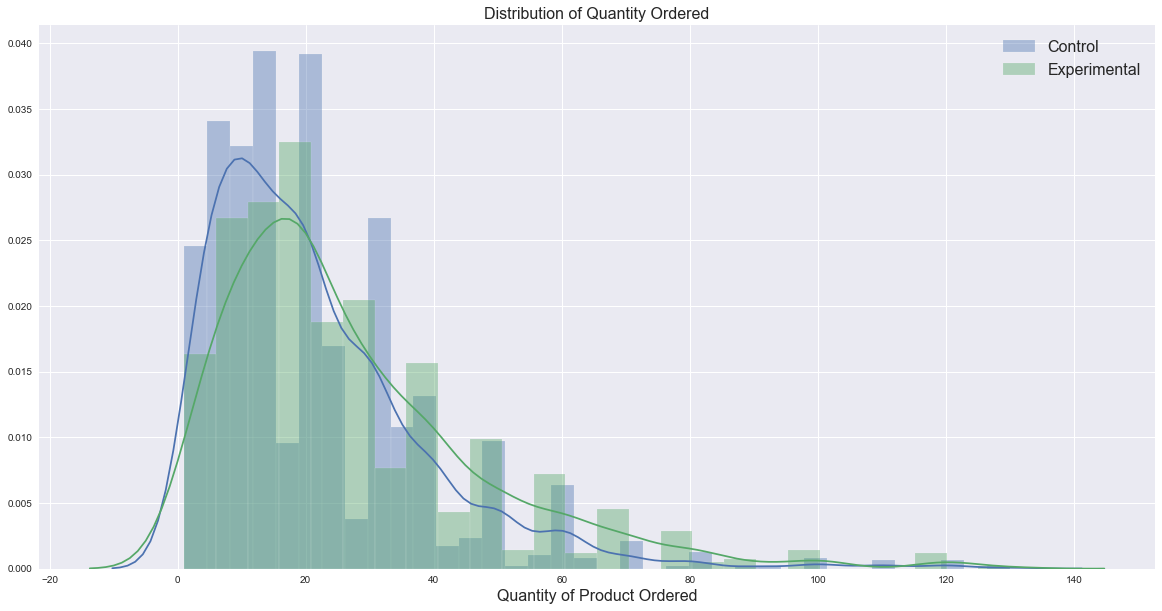

In [670]:
control = df_OrderDetail[df_OrderDetail['Discount'] == 0]
control = control['Quantity']
exp = df_OrderDetail[df_OrderDetail['Discount'] != 0]
exp = exp['Quantity']

plt.figure(figsize=(20, 10))
sns.distplot(control, label='Control')
sns.distplot(exp, label='Experimental')
plt.title('Distribution of Quantity Ordered', fontsize=16)
plt.xlabel('Quantity of Product Ordered', fontsize=16)
plt.legend(frameon=False, fontsize=16, loc='best')

We can see a difference between the mean of the distribution of the control (no discount) and the mean of the distribution of the experimental (discount). We will see now what this difference is and the probability of rejecting or accepting the null hypothesis.

In [671]:
#Calculating the difference between distribution means

control.mean()
exp.mean()
exp.mean() - control.mean()

5.394523243866239

What is the probability to observe this given data? We can assume that if the mean difference is equal to zero the null hypothesis is assumed to be true.

In [672]:
#Checking to see if we use Student's or Welch's T-Test

np.var(nodiscount) == np.var(discount)

OrderId      False
ProductId    False
UnitPrice    False
Quantity     False
Discount     False
dtype: bool

Welch's T-test, as opposed to Student's T-Test is more reliable when the variances are not equal. Here the variances are not equal and therefore we will first perform Welch's T test to see if the population means are equal.

In [673]:
# Two-Sample TTest
results = stats.ttest_ind(discount.Quantity, nodiscount.Quantity, equal_var=False)

# If p < 0.05, we can reject the null hypothesis
alpha = 0.05
if (results[0] > 0) & (results[1]/2 < alpha):
    print("Reject null hypothesis, the mean of Discount is greater than mean of No Discount")
else:
    print("Accept null hypothesis")
    
print(results)

Reject null hypothesis, the mean of Discount is greater than mean of No Discount
Ttest_indResult(statistic=6.239069142123973, pvalue=5.65641429030433e-10)


Next, we will perform Cohen's D to understand the effect size between the two means.

In [674]:
def cohens_d(group1, group2):
    numer = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    denom = np.sqrt(pooled_var)
    return numer / denom
cohens_d(discount.Quantity, nodiscount.Quantity)

0.2862724481729282

While 0.2862724481729282 is a small effect size, we can conclude (although not with high confidence) that the effect size is statistically significant.

### Part 2 - Is there a difference in level of discount?

By rejecting the null hypothesis, we have learned that the orders that had a discount applied to them also had different quantities in the order. We will now observe the differences in discount types to see if there is a difference in for example, a 5% discount or a 25% discount.

In [675]:
#Let's find all of the different discounts that were offered
discounts_type = df_OrderDetail['Discount'].unique()
discounts_type.sort()

print(discounts_type)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.1  0.15 0.2  0.25]


In [676]:
df_OrderDetail['Discount'].value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

ANOVA Testing

In [677]:
df_OrderDetail['Discount'] = df_OrderDetail['Discount'].apply(lambda x: 0.05 if (x > 0) & (x < 0.10) else x)
df_OrderDetail['Discount'].value_counts()

0.00    1317
0.05     193
0.10     173
0.20     161
0.15     157
0.25     154
Name: Discount, dtype: int64

In [678]:
formula = 'Quantity ~ C(Discount)'
lm = ols(formula, df_OrderDetail).fit()
table = sm.stats.anova_lm(lm, typ=1)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(Discount),5.0,15969.214452,3193.842890,8.990431,1.816734e-08
Residual,2149.0,763430.421743,355.249149,NaN,NaN


The p-value is less than 0.05 therefore we can reject the null hypothesis. 

### Question 1 - Conclusions
Given the p value is less than 0.05, we are able to reject the null hypothesis. Therefore, there is a statistical significance that the average quantity of a product in an order will either be higher or lower  when there is a discount than when there is no discount.<br><br>
Cohen's D yields a result of 0.2862724481729282 which is a small but not trivial effect size.<br><br>
Using ANOVA, we learn that the amount of discount has an effect on the quantity of the sales.

## Question #2 - Is there is a statistical difference between the performances of the shipping companies?

𝐻0 - Null Hypothesis - There is not statistical difference between the performances of the shipping companies<br>
𝐻1 - Alternative Hypothesis - There is a statistical difference between the performances of the shipping companies.

In [679]:
#Querying shipping

query = """SELECT CompanyName, Freight
               FROM [Shipper] s
               JOIN [Order] o
               ON o.ShipVia = s.Id"""

df_Ship_Companies = pd.read_sql_query(query, conn)

df_Ship_Companies.head(10)

,CompanyName,Freight
0,Federal Shipping,32.38
1,Speedy Express,11.61
2,United Package,65.83
3,Speedy Express,41.34
4,United Package,51.30
5,United Package,58.17
6,United Package,22.98
7,Federal Shipping,148.33
8,United Package,13.97
9,Federal Shipping,81.91


In [680]:
df_Ship_Companies['CompanyName'].value_counts()

United Package      326
Federal Shipping    255
Speedy Express      249
Name: CompanyName, dtype: int64

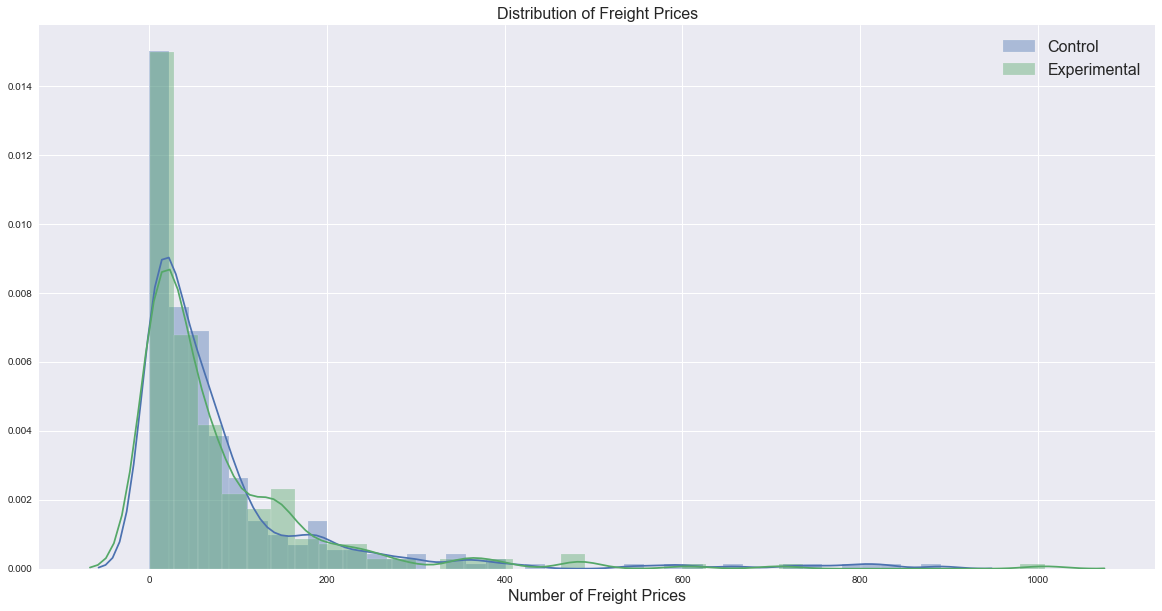

In [681]:
ship_control = df_Ship_Companies[df_Ship_Companies['CompanyName'] == 'United Package']
ship_control = ship_control['Freight']
ship_exp = df_Ship_Companies[df_Ship_Companies['CompanyName'] == 'Federal Shipping']
ship_exp = ship_exp['Freight']

plt.figure(figsize=(20, 10))
sns.distplot(ship_control, label='Control')
sns.distplot(ship_exp, label='Experimental')
plt.title('Distribution of Freight Prices', fontsize=16)
plt.xlabel('Number of Freight Prices', fontsize=16)
plt.legend(frameon=False, fontsize=16, loc='best')

The mean distributions and standard deviations between the performances of the companies Federal Shipping and United Package are visually very similar. We will need to go farther to calculate if there is a difference and if we can and cannot reject the null hypothesis.

In [682]:
#Calculating the difference between distribution means

control.mean()
ship_exp.mean()
ship_exp.mean() - ship_control.mean()

-6.19942848550464

In [683]:
#Checking to see if we use Student's or Welch's T-Test

np.var(ship_exp) == np.var(ship_control)

False

The variances are not the same so we will perform Welch's T-Test.

In [684]:
# Two-Sample TTest
results = stats.ttest_ind(ship_exp, ship_control, equal_var=False)

# If p < 0.05, we can reject the null hypothesis
alpha = 0.05
if (results[0] > 0) & (results[1]/2 < alpha):
    print("Reject null hypothesis, mean of Discounted is greater than mean of Non-Discounted")
else:
    print("Accept null hypothesis")
    
print(results)

Accept null hypothesis
Ttest_indResult(statistic=-0.5794226261355386, pvalue=0.562531637859008)


The p-value is larger than 0.05 and therefore we do not reject the null hypothesis. There is not enough evidence that there is a statistical difference between the performances of the two shipping companies.

In [685]:
def cohens_d(group1, group2):
    numer = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    denom = np.sqrt(pooled_var)
    return numer / denom
cohens_d(ship_exp, ship_control)

-0.047585527662770445

### Question 2 - Conclusions<br>
Given the p value is more than 0.05, we are unable to reject the null hypothesis. Therefore, there is no statistical significance that the performances of the two shipping companies are different.<br><br>
Cohen's D yields a result of -0.047585527662770445 which is very small.

## Question #3 - Does the time of year (first half of the year or second half of the year) have an impact on the quantity of orders?

This hypothesis testing addresses the question of time of year and impact on quantity of sales. Does seasonality affect orders?

𝐻0 - Null Hypothesis - Time of year has no statistical significance on the quantity of sales.<br>
𝐻1 - Alternative Hypothesis - There is a difference in quantity of sales depending on time of year.

In [686]:
df_OrderDate = df_Order.sort_values(by="OrderDate")
df_OrderDate.tail(1)

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
829,11077,RATTC,1,2014-05-06,2014-06-03,None,2,8.53,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,North America,87110,USA


In [687]:
df_OrderDetail.head(1)

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0


In [688]:
#Querying Order Dates and Quantity

query3 = """SELECT o.Id, o.OrderDate, od.Quantity
               FROM [Order] o
               JOIN [OrderDetail] od
               ON o.Id = od.OrderId"""

df_timeorder = pd.read_sql_query(query3, conn)

df_timeorder.head(3)

,Id,OrderDate,Quantity
0,10248,2012-07-04,12
1,10248,2012-07-04,10
2,10248,2012-07-04,5


In [689]:
df_timeorder.tail(3)

,Id,OrderDate,Quantity
2152,11077,2014-05-06,2
2153,11077,2014-05-06,4
2154,11077,2014-05-06,2


In [690]:
#Checking for null values
df_timeorder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2155 non-null   int64 
 1   OrderDate  2155 non-null   object
 2   Quantity   2155 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 50.6+ KB


In [691]:
#Converting into datetime and Dividing dates into time periods

df_timeorder['OrderDate'] = pd.to_datetime(df_timeorder['OrderDate'])

df_timeorder['OrderDate_Month'] = df_timeorder['OrderDate'].dt.month

#First half of year (Orders made in January through June)

first = df_timeorder[df_timeorder['OrderDate_Month'] < 7]

#Second half of year (Orders made in July through December)

second = df_timeorder[df_timeorder['OrderDate_Month'] >= 7]

second.head()

,Id,OrderDate,Quantity,OrderDate_Month
0,10248,2012-07-04,12,7
1,10248,2012-07-04,10,7
2,10248,2012-07-04,5,7
3,10249,2012-07-05,9,7
4,10249,2012-07-05,40,7


In [692]:
firsthalf = first['Quantity']
secondhalf = second['Quantity']

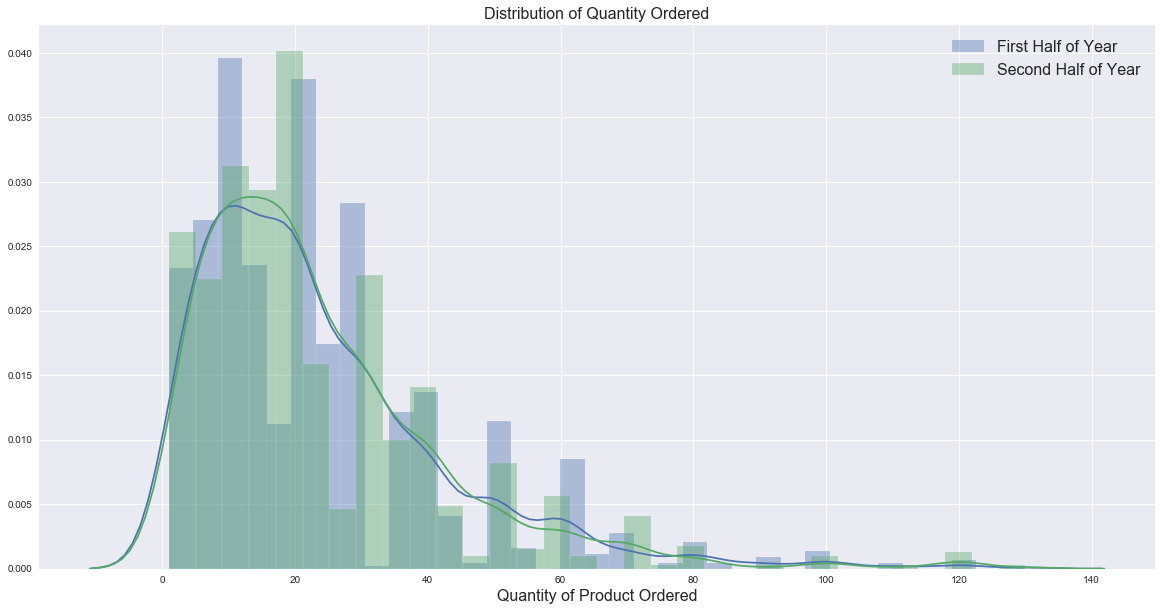

In [693]:
plt.figure(figsize=(20, 10))
sns.distplot(firsthalf, label='First Half of Year')
sns.distplot(secondhalf, label='Second Half of Year')
plt.title('Distribution of Quantity Ordered', fontsize=16)
plt.xlabel('Quantity of Product Ordered', fontsize=16)
plt.legend(frameon=False, fontsize=16, loc='best')

In [694]:
#Calculating the difference between distribution means

firsthalf.mean()
secondhalf.mean()
secondhalf.mean() - firsthalf.mean()

-0.07987298273086907

In [695]:
#Checking to see if we use Student's or Welch's T-Test

np.var(secondhalf) == np.var(firsthalf)

False

In [696]:
# Two-Sample TTest
results = stats.ttest_ind(secondhalf, firsthalf, equal_var=False)

# If p < 0.05, we can reject the null hypothesis
alpha = 0.05
if (results[0] > 0) & (results[1]/2 < alpha):
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")
    
print(results)

Accept null hypothesis
Ttest_indResult(statistic=-0.09705289055663115, pvalue=0.9226937528770595)


In [697]:
def cohens_d(group1, group2):
    numer = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    denom = np.sqrt(pooled_var)
    return numer / denom
cohens_d(secondhalf, firsthalf)

-0.004198005202358135

### Question 3 - Conclusions<br>
Given the p value is more than 0.05, we are able to reject the null hypothesis. Therefore, there is a no statistical significance that the time of year has a difference on the quantity of orders.<br><br>
Cohen's D yields a result of -0.004198005202358135 which is a very small.

## Question #4 - Is there a statistically significant difference between performance of UK employees and US employees?

𝐻0 - Null Hypothesis - There is no statistical difference between the performances (by shipping dates) of UK and US employees.<br>
𝐻1 - Alternative Hypothesis - There is a difference between the performances (by shipping dates) of UK and US employees.

In [698]:
#Querying shipping dates

query2 = """SELECT o.Id, o.OrderDate, o.ShippedDate, e.Country
               FROM [Order] o
               JOIN [Employee] e
               ON o.EmployeeId = e.Id"""

df_employee = pd.read_sql_query(query2, conn)

df_employee.head(10)

,Id,OrderDate,ShippedDate,Country
0,10248,2012-07-04,2012-07-16,UK
1,10249,2012-07-05,2012-07-10,UK
2,10250,2012-07-08,2012-07-12,USA
3,10251,2012-07-08,2012-07-15,USA
4,10252,2012-07-09,2012-07-11,USA
5,10253,2012-07-10,2012-07-16,USA
6,10254,2012-07-11,2012-07-23,UK
7,10255,2012-07-12,2012-07-15,UK
8,10256,2012-07-15,2012-07-17,USA
9,10257,2012-07-16,2012-07-22,USA


In [699]:
df_employee['orderdate'] = pd.to_datetime(df_employee['OrderDate'])
df_employee['shipdate'] = pd.to_datetime(df_employee['ShippedDate'])
df_employee['processingtime'] = df_employee['shipdate'] - df_employee['orderdate']
df_employee['processingtime'] = df_employee['processingtime'].dt.days

df_Processingtime

0      12.0
1       5.0
2       4.0
3       7.0
4       2.0
       ... 
825     NaN
826     NaN
827     NaN
828     NaN
829     NaN
Length: 830, dtype: float64

In [700]:
df_employee.dropna(inplace=True)
df_employee

,Id,OrderDate,ShippedDate,Country,orderdate,shipdate,processingtime
0,10248,2012-07-04,2012-07-16,UK,2012-07-04,2012-07-16,12.0
1,10249,2012-07-05,2012-07-10,UK,2012-07-05,2012-07-10,5.0
2,10250,2012-07-08,2012-07-12,USA,2012-07-08,2012-07-12,4.0
3,10251,2012-07-08,2012-07-15,USA,2012-07-08,2012-07-15,7.0
4,10252,2012-07-09,2012-07-11,USA,2012-07-09,2012-07-11,2.0
...,...,...,...,...,...,...,...
815,11063,2014-04-30,2014-05-06,USA,2014-04-30,2014-05-06,6.0
816,11064,2014-05-01,2014-05-04,USA,2014-05-01,2014-05-04,3.0
818,11066,2014-05-01,2014-05-04,UK,2014-05-01,2014-05-04,3.0
819,11067,2014-05-04,2014-05-06,USA,2014-05-04,2014-05-06,2.0


In [701]:
usa = df_employee[df_employee['Country'] == 'USA']['processingtime']
uk  = df_employee[df_employee['Country'] == 'UK']['processingtime']

In [702]:
df_employee.describe()

,Id,processingtime
count,809.000000,809.000000
mean,10652.234858,8.491965
std,234.078368,6.838682
min,10248.000000,1.000000
25%,10450.000000,4.000000
50%,10652.000000,7.000000
75%,10854.000000,9.000000
max,11069.000000,37.000000


The mean processing time for all employees was 8.5 days

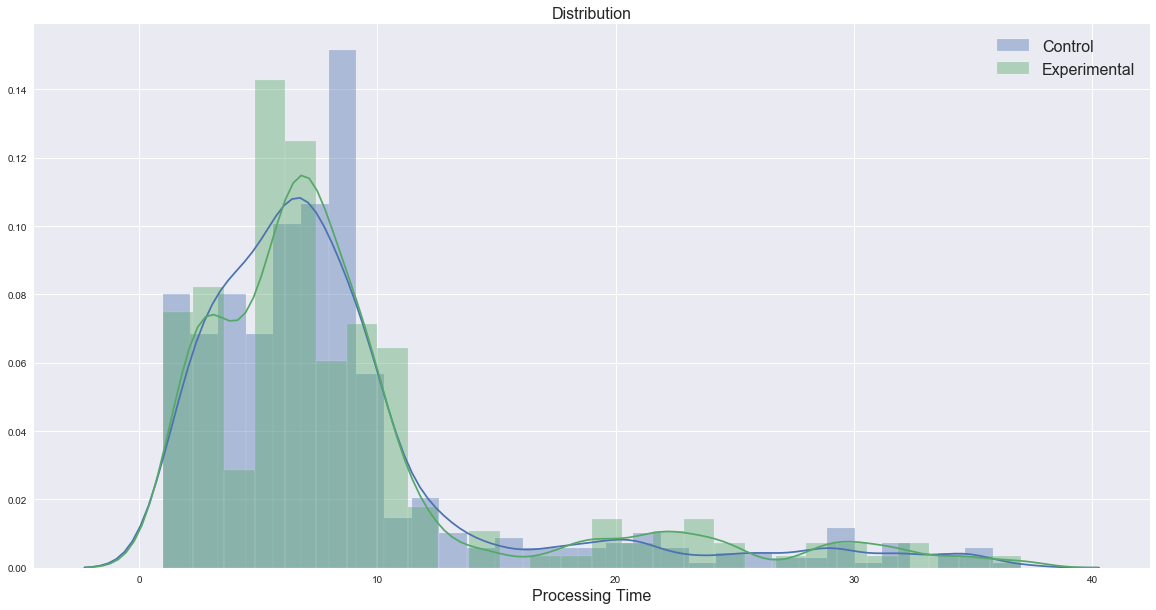

In [703]:
plt.figure(figsize=(20, 10))
sns.distplot(usa, label='Control')
sns.distplot(uk, label='Experimental')
plt.title('Distribution', fontsize=16)
plt.xlabel('Processing Time', fontsize=16)
plt.legend(frameon=False, fontsize=16, loc='best')

In [704]:
#Calculating the difference between distribution means

usa.mean()
uk.mean()
uk.mean() - usa.mean()

0.43170493177478697

In [705]:
#Checking to see if we use Student's or Welch's T-Test

np.var(uk) == np.var(usa)

False

In [706]:
# Two-Sample TTest
results = stats.ttest_ind(usa, uk, equal_var=False)

# If p < 0.05, we can reject the null hypothesis
alpha = 0.05
if (results[0] > 0) & (results[1]/2 < alpha):
    print("Reject null hypothesis, mean of uk is greater than mean of usa")
else:
    print("Accept null hypothesis")
    
print(results)

Accept null hypothesis
Ttest_indResult(statistic=-0.7695386498978051, pvalue=0.4420736220711057)


In [707]:
def cohens_d(group1, group2):
    numer = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    denom = np.sqrt(pooled_var)
    return numer / denom
cohens_d(uk, usa)

0.06310985453186796

### Question 4 - Conclusions<br>
Given the p value is more than 0.05, we are able to reject the null hypothesis. Therefore, there is a no statistical significance that the performance of employees in the US is different than in the UK.<br><br>
Cohen's D yields a result of 0.06310985453186796 which is a very small.

# Conclusions

From our hypothesis testing we were able to reject the null hypothesis for the question of if discounts had a significant effect on the quantity of the order. Therefore there is strong evidence that discount does play a role in how much someone orders a product. For the other three questions, there was no significant evidence that allowed to reject the null hypothesis. The performances of shipping companies, the time of year vs the quantity of orders, and the differences of performances of UK and US employees did all not yield any significant statistical differences.